In [15]:
import json
import matplotlib.pyplot as plt
import os

In [23]:
with open(os.path.abspath(r'../../resources/mock_data.json')) as file:
    sensor_data = json.load(file)

print(sensor_data[0])  # check there is something in there

{'message': 867428, 'time': 1740676461.533286, 'sendtime': 1740676461.5332832, 'sensors': 1, 'type': 'routine', '1': {'time': 1740676461.5332866, 'sensor': '1', 'data': '9040,934F,2F4F,526C,88D5,C0B3,C16F,EB9A,02A9,DC57,97A7,CC4B,CAF6,F312,EDF4,42C4,74F1,E843,1AE9,2DE2,7EF3,912E,3217,0F43,DF86,2C03,E725,C0D7,E05E,CA93,15BA,8C47,7AA0,26BD,EB44,BCFD,F1CD,09C3,071D,6909,C0E9,7F54,604C,8F91,0818,89D3,58EB,EAC7', 'model': 'uSPa44', 'taxels': 16, 'tempraw': [33337, 33205, 35607], 'temp': [307.53], 'ups': [105.17100960863372], 'calibrated': [0.059, 0.021, 0.15]}}


In [21]:
def convert_raw_sensor_data(data: list) -> list[dict]:
    """ 
        Extract the time, x, y, z forces from raw sensor readings.
        Returns an array of dicts.
    """
    out = []
    for reading in data:
        msg = reading['1']['data']
        msg = msg.split(',')
        msg = zip(msg[0::3], msg[1::3], msg[2::3])

        temp = {}
        for i, (x, y, z) in enumerate(msg):
            temp[str(i)] = {
                'time': reading['time'],  # keep it here for an easier plotting, 'has a UNIX timestamp of data creation', there is also a time for sensor reading
                'x': int(x, 16),
                'y': int(y, 16),
                'z': int(z, 16)
            }
        out.append(temp)
    return out


proc_sensor_data = convert_raw_sensor_data(sensor_data)
proc_sensor_data[0]  # check it works

{'0': {'time': 1740676461.533286, 'x': 36928, 'y': 37711, 'z': 12111},
 '1': {'time': 1740676461.533286, 'x': 21100, 'y': 35029, 'z': 49331},
 '2': {'time': 1740676461.533286, 'x': 49519, 'y': 60314, 'z': 681},
 '3': {'time': 1740676461.533286, 'x': 56407, 'y': 38823, 'z': 52299},
 '4': {'time': 1740676461.533286, 'x': 51958, 'y': 62226, 'z': 60916},
 '5': {'time': 1740676461.533286, 'x': 17092, 'y': 29937, 'z': 59459},
 '6': {'time': 1740676461.533286, 'x': 6889, 'y': 11746, 'z': 32499},
 '7': {'time': 1740676461.533286, 'x': 37166, 'y': 12823, 'z': 3907},
 '8': {'time': 1740676461.533286, 'x': 57222, 'y': 11267, 'z': 59173},
 '9': {'time': 1740676461.533286, 'x': 49367, 'y': 57438, 'z': 51859},
 '10': {'time': 1740676461.533286, 'x': 5562, 'y': 35911, 'z': 31392},
 '11': {'time': 1740676461.533286, 'x': 9917, 'y': 60228, 'z': 48381},
 '12': {'time': 1740676461.533286, 'x': 61901, 'y': 2499, 'z': 1821},
 '13': {'time': 1740676461.533286, 'x': 26889, 'y': 49385, 'z': 32596},
 '14': {'t

In [13]:
def prep_for_plotting(data: list) -> tuple[list, list, list, list]:
    """
        Prepares the processed data for plotting i.e., 16 arrays of time, x, y, z coordinates coming from each sensor.
        Returns a tuple of arrays time, x, y, z.
    """
    plot_data_t = [[] for _ in range(16)]  # 16 sensors
    plot_data_x = [[] for _ in range(16)]  # 16 sensors
    plot_data_y = [[] for _ in range(16)]  # 16 sensors
    plot_data_z = [[] for _ in range(16)]  # 16 sensors

    for e in data:
        for k, v in e.items():
            plot_data_t[int(k)].append(v['time'])
            plot_data_x[int(k)].append(v['x'])
            plot_data_y[int(k)].append(v['y'])
            plot_data_z[int(k)].append(v['z'])

    return plot_data_t, plot_data_x, plot_data_y, plot_data_y


ts, xs, ys, zs = prep_for_plotting(proc_sensor_data)
print('{}\n{}\n{}\n{}\n'.format(ts[0][:5], xs[0][:5], ys[0][:5], zs[0][:5]))

[1740138412.5136962, 1740138412.5136962, 1740138412.5136962, 1740138412.5136962, 1740138412.5136962]
[30408, 30408, 30408, 30408, 30408]
[31879, 31879, 31879, 31879, 31879]
[31879, 31879, 31879, 31879, 31879]



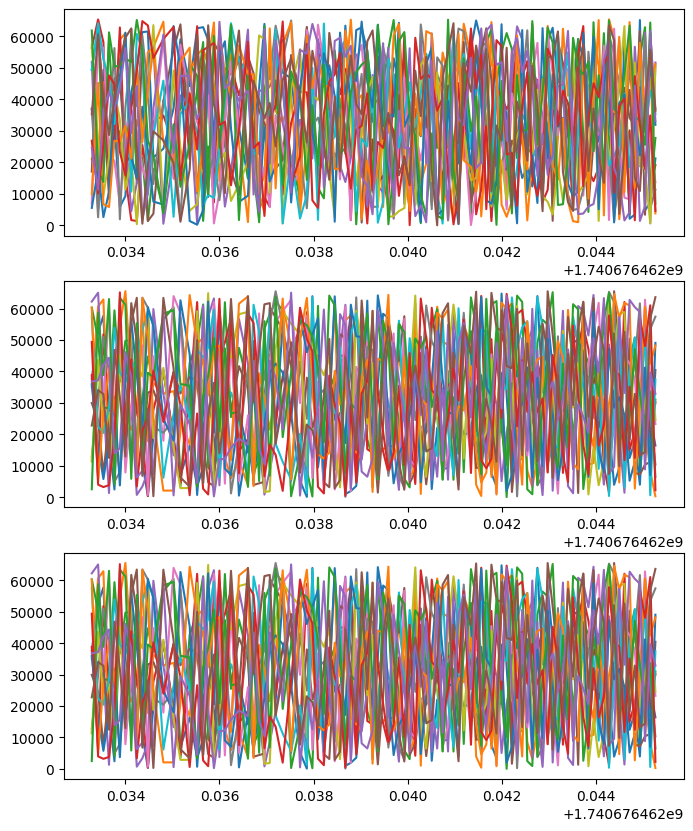

In [25]:
fig, axes = plt.subplots(3, 1, figsize=(8, 10))

x_ax, y_ax, z_ax = axes[0], axes[1], axes[2]

ts, xs, ys, zs = prep_for_plotting(proc_sensor_data)

for i in range(len(ts)):
    x_ax.plot(ts[i], xs[i], label=f'Sensor #{i}')
    y_ax.plot(ts[i], ys[i], label=f'Sensor #{i}')
    z_ax.plot(ts[i], zs[i], label=f'Sensor #{i}')

# plt.legend()
plt.show()